<a href="https://colab.research.google.com/github/Tousside/news_correlation_10ac_week0/blob/task-1/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Global news dataset

In [ ]:
news_data= pd.read_csv('drive/MyDrive/data.csv.zip')

## Traffic dataset

In [ ]:
import zipfile
with zipfile.ZipFile('drive/MyDrive/traffic_data.zip', 'r') as f:
  f.extractall('drive/MyDrive')

traffic_data= pd.read_csv('drive/MyDrive/traffic.csv')

## Location dataset

In [ ]:
location_data=pd.read_csv("drive/MyDrive/domains_location.csv")

In [ ]:
news_data.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral


In [ ]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58356 entries, 0 to 58355
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       58356 non-null  int64 
 1   source_id        17771 non-null  object
 2   source_name      58356 non-null  object
 3   author           56193 non-null  object
 4   title            58356 non-null  object
 5   description      58346 non-null  object
 6   url              58356 non-null  object
 7   url_to_image     54905 non-null  object
 8   published_at     58356 non-null  object
 9   content          58356 non-null  object
 10  category         58335 non-null  object
 11  article          58356 non-null  object
 12  title_sentiment  58356 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.8+ MB


In [ ]:
news_data.isnull().sum()

article_id             0
source_id          40585
source_name            0
author              2163
title                  0
description           10
url                    0
url_to_image        3451
published_at           0
content                0
category              21
article                0
title_sentiment        0
dtype: int64

In [ ]:
news_data.shape

(58356, 13)

In [ ]:
news_data['title_length']=news_data['title'].apply(lambda x:len(str(x)))

In [ ]:
news_data['content_length']=news_data['content'].apply(lambda x:len(str(x)))

In [ ]:
news_data["content_length"].describe()

count    58356.000000
mean       207.838920
std         28.566682
min         25.000000
25%        213.000000
50%        214.000000
75%        214.000000
max        216.000000
Name: content_length, dtype: float64

# The top 10 Websites that have the largest count of news articles


<Axes: xlabel='Websites', ylabel='Number of articles'>

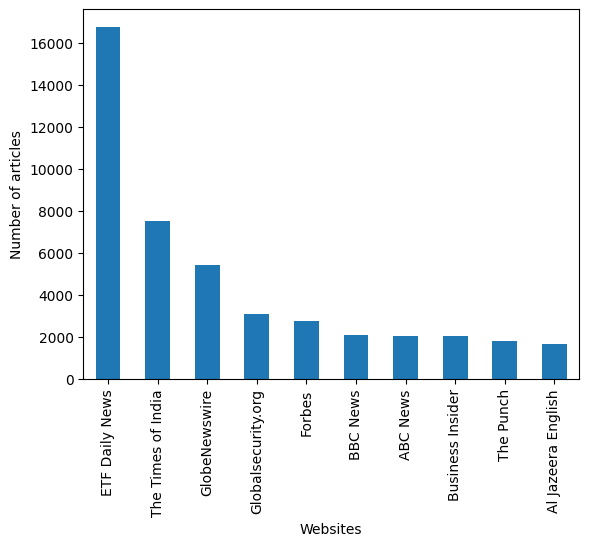

In [ ]:
news_data["source_name"].value_counts() \
                      .sort_values(ascending=False) \
                      .head(10) \
                      .plot(kind='bar', ylabel='Number of articles', xlabel='Websites')


# The bottom 10 Websites that have the largest count of news articles


<Axes: xlabel='Websites', ylabel='Number of articles'>

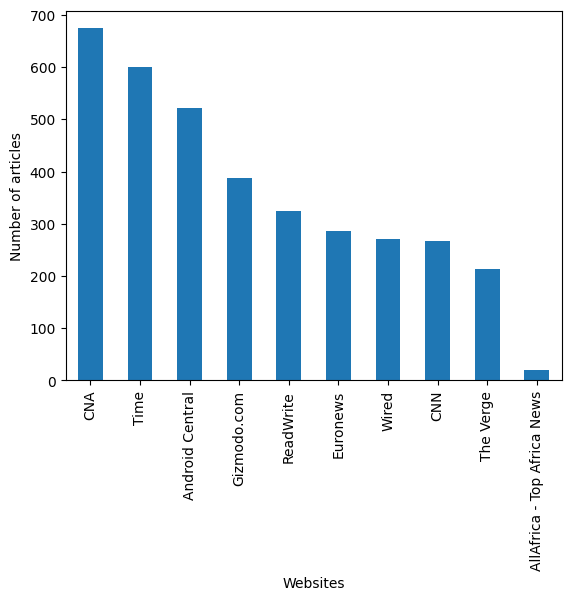

In [ ]:
news_data["source_name"].value_counts() \
                        .sort_values(ascending=False) \
                        .tail(10) \
                        .plot(kind='bar', ylabel='Number of articles', xlabel='Websites')


# Websites with the highest numbers of visitors traffic

In [ ]:

traffic_data.groupby("Domain")['RefIPs'].sum() \
            .sort_values(ascending=False) \
            .plot(kind='bar', ylabel='Numbers of visitors', xlabel='Websites')
plt.show()


# Countries with the highest number of news media organisations (represented by domains in the data)


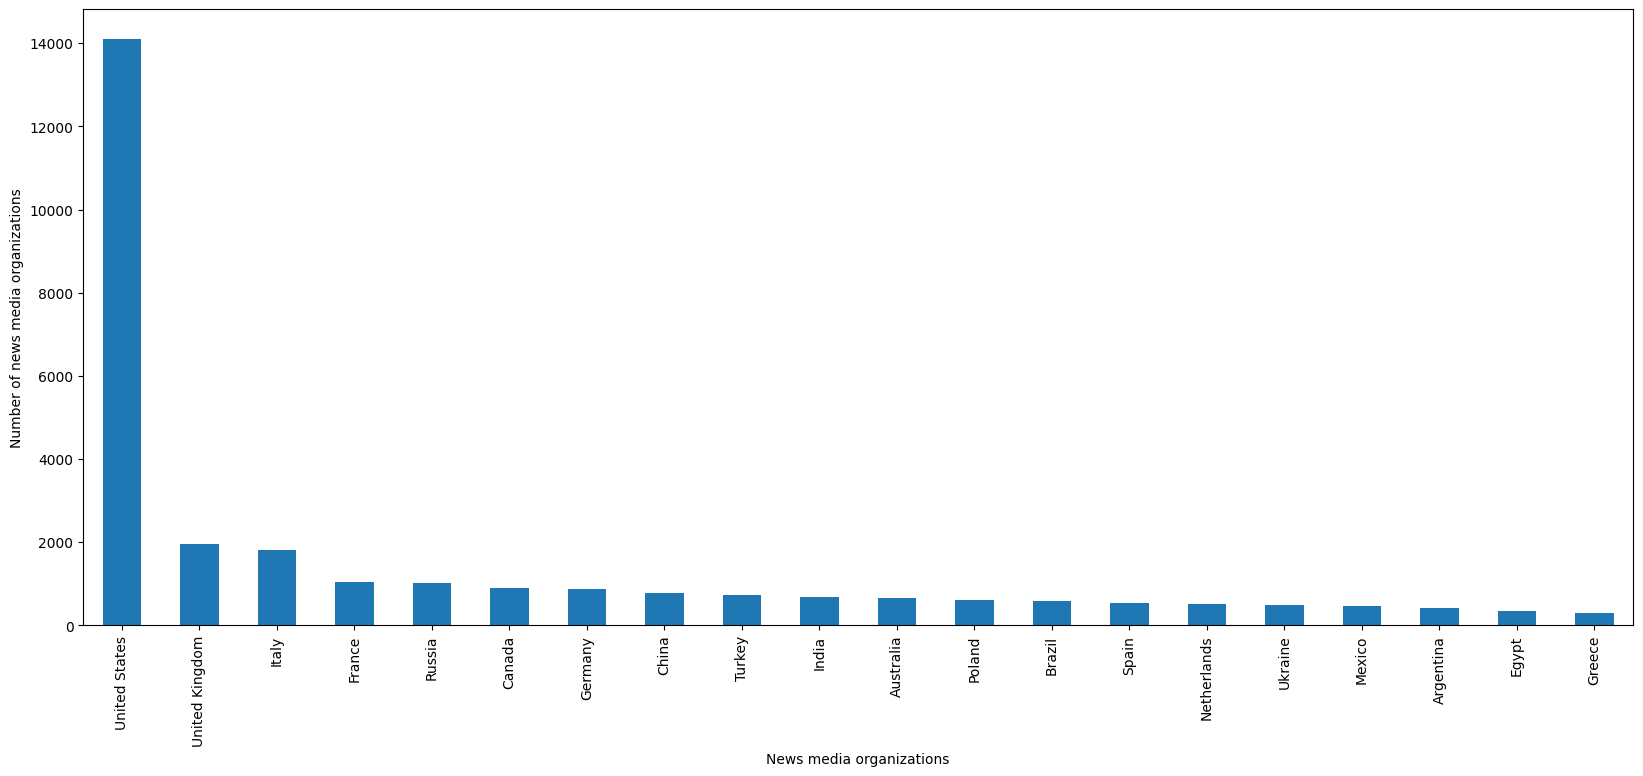

In [ ]:
plt.figure(figsize=(20, 8))
location_data["Country"].value_counts() \
                       .sort_values(ascending=False) \
                       .head(20) \
                       .plot(kind='bar', ylabel='Number of news media organizations', xlabel='News media organizations')
plt.show()


# Countries that have many articles written about them - the content of the news is about that country




In [ ]:
category_country=news_data[news_data.category.isin([country for country in location_data["Country"]])]

In [ ]:
many_articles_countries=category_country["category"].value_counts()[category_country["category"].value_counts()>1].index

In [ ]:
category_country["category"].value_counts()[category_country["category"].value_counts()>1]

category
Canada            2066
India             1054
Australia          877
United Kingdom     753
Ukraine            577
                  ... 
San Marino           4
Honduras             3
Andorra              3
Burundi              3
Martinique           2
Name: count, Length: 164, dtype: int64

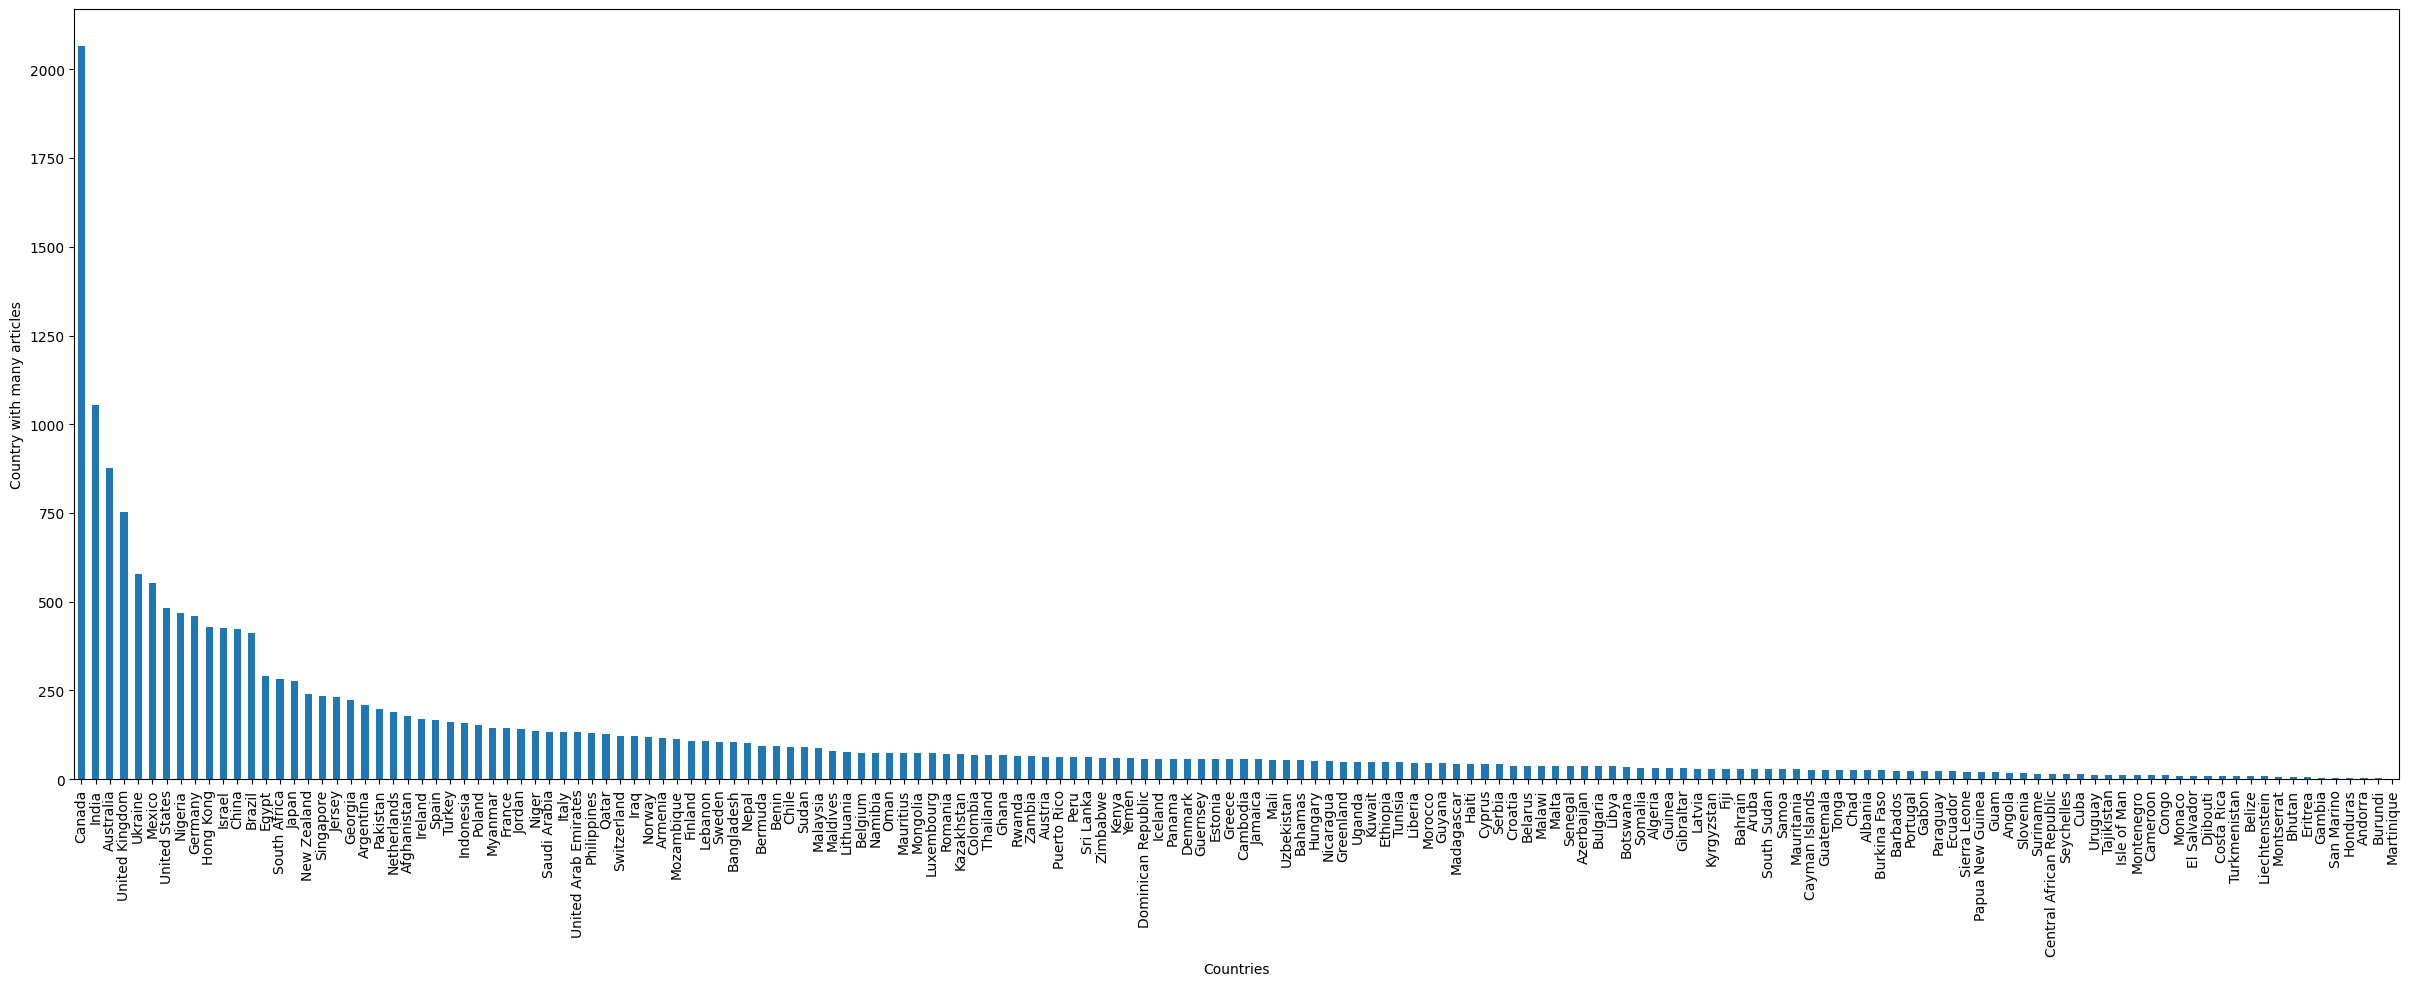

In [ ]:

plt.figure(figsize=(30, 10))
category_country["category"].value_counts()[category_country["category"].value_counts() > 1] \
                                .plot(kind='bar', ylabel='Country with many articles', xlabel='Countries')
plt.show()


# Websites that reported (the news content) about Africa, US, China, EU, Russia, Ukraine, Middle East? Note that you will need to group countries together to form the African, EU, and Middle East continents/regions.

In [ ]:
pip install a-world-of-countries

In [ ]:
# Import the AWOC package.
import awoc

# Initialize the AWOC class.
my_world = awoc.AWOC()



## Africa

In [ ]:
# Let's retrieve the full list of nations of Africa.
countries_of_Africa = my_world.get_countries_list_of('Africa')

african_countries_news=category_country[news_data.category.isin(countries_of_Africa)]

african_countries_news.source_name.unique()

<ipython-input-26-c847daf27d11>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  african_countries_news=category_country[news_data.category.isin(countries_of_Africa)]


array(['Time', 'Phys.Org', 'Digital Trends', 'Al Jazeera English',
       'BBC News', 'Deadline', 'Euronews', 'RT', 'Forbes', 'The Punch',
       'CNA', 'International Business Times', 'The Indian Express',
       'ETF Daily News', 'ABC News', 'Globalsecurity.org',
       'Marketscreener.com', 'The Times of India', 'GlobeNewswire',
       'Android Central', 'Business Insider', 'Gizmodo.com', 'NPR', 'CNN',
       'Wired', 'ReadWrite', 'Boing Boing', 'The Verge'], dtype=object)

## Europe

In [ ]:
# Let's retrieve the full list of nations of Europe.
countries_of_Europe = my_world.get_countries_list_of('Europe')

europe_countries_news=category_country[news_data.category.isin(countries_of_Europe)]
europe_countries_news.source_name.unique()

<ipython-input-27-37bb50826042>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  europe_countries_news=category_country[news_data.category.isin(countries_of_Europe)]


array(['Forbes', 'CNA', 'ABC News', 'Globalsecurity.org',
       'Al Jazeera English', 'Time', 'Deadline', 'RT', 'Euronews',
       'Business Insider', 'International Business Times', 'The Punch',
       'GlobeNewswire', 'BBC News', 'Wired', 'The Verge', 'ReadWrite',
       'NPR', 'Android Central', 'Phys.Org', 'The Indian Express',
       'The Times of India', 'Boing Boing', 'CNN', 'Digital Trends',
       'Marketscreener.com', 'Gizmodo.com', 'ETF Daily News'],
      dtype=object)

## Russia

In [ ]:


russia_news=category_country[news_data.category=="Russia"]

russia_news.source_name.unique()



<ipython-input-28-3c1a2efecc84>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  russia_news=category_country[news_data.category=="Russia"]


array([], dtype=object)

## Ukraine

In [ ]:


ukraine_news=category_country[news_data.category=="Ukraine"]

ukraine_news.source_name.unique()

<ipython-input-29-bc43678dd6f5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ukraine_news=category_country[news_data.category=="Ukraine"]


array(['BBC News', 'Time', 'Business Insider', 'Gizmodo.com', 'Wired',
       'NPR', 'ReadWrite', 'Boing Boing', 'The Verge', 'ABC News', 'RT',
       'Globalsecurity.org', 'The Times of India',
       'International Business Times', 'Al Jazeera English', 'Phys.Org',
       'The Punch', 'GlobeNewswire', 'Forbes'], dtype=object)

# Websites with the highest count of positive, neutral, and negative sentiment

<Axes: xlabel='title_sentiment'>

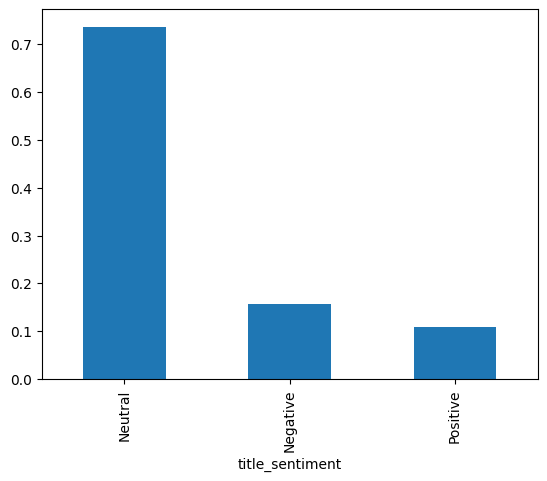

In [ ]:
news_data['title_sentiment'].value_counts(normalize=True).plot(kind="bar")

## Positive sentiment

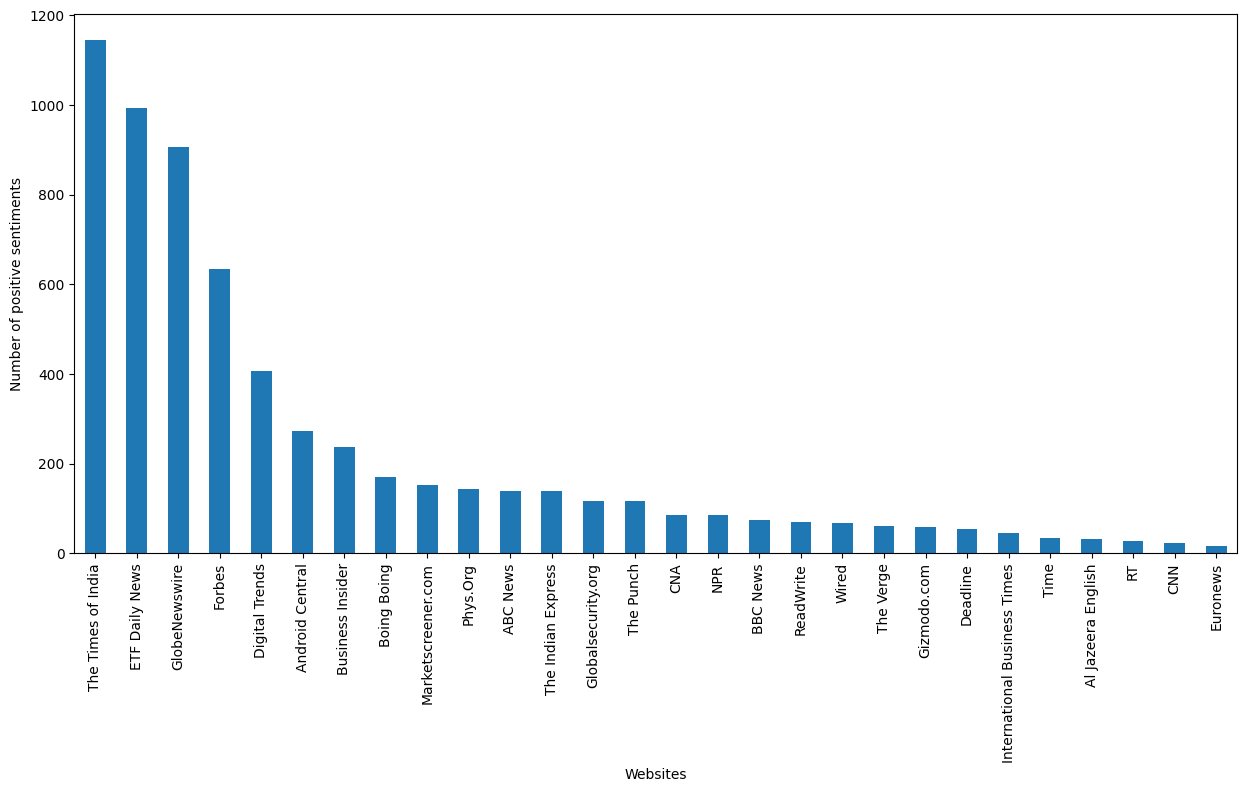

In [ ]:

plt.figure(figsize=(15, 7))
news_data[news_data['title_sentiment']=="Positive"]['source_name'].value_counts() \
            .sort_values(ascending=False) \
            .plot(kind='bar', ylabel='Number of positive sentiments', xlabel='Websites')
plt.show()


## Neutral sentiment

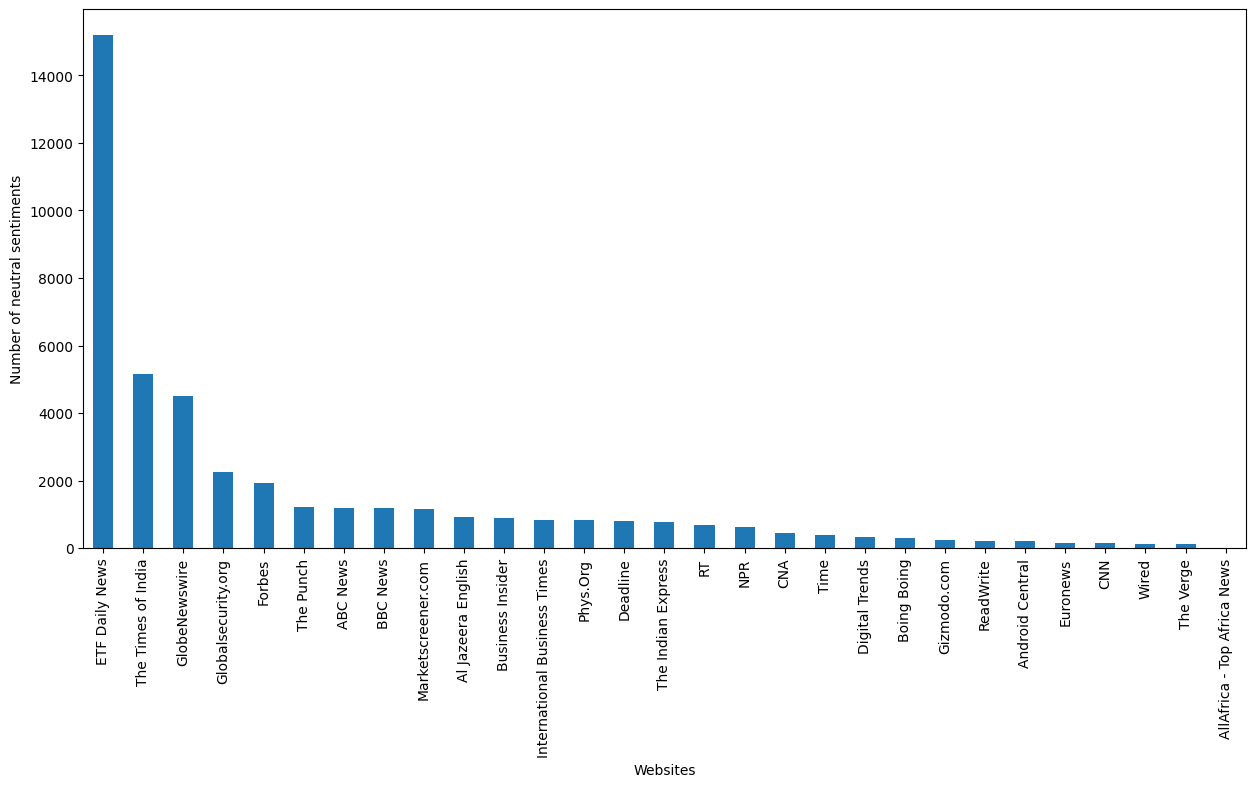

In [ ]:

plt.figure(figsize=(15, 7))
news_data[news_data['title_sentiment']=="Neutral"]['source_name'].value_counts() \
            .sort_values(ascending=False) \
            .plot(kind='bar', ylabel='Number of neutral sentiments', xlabel='Websites')
plt.show()


## Negative sentiment

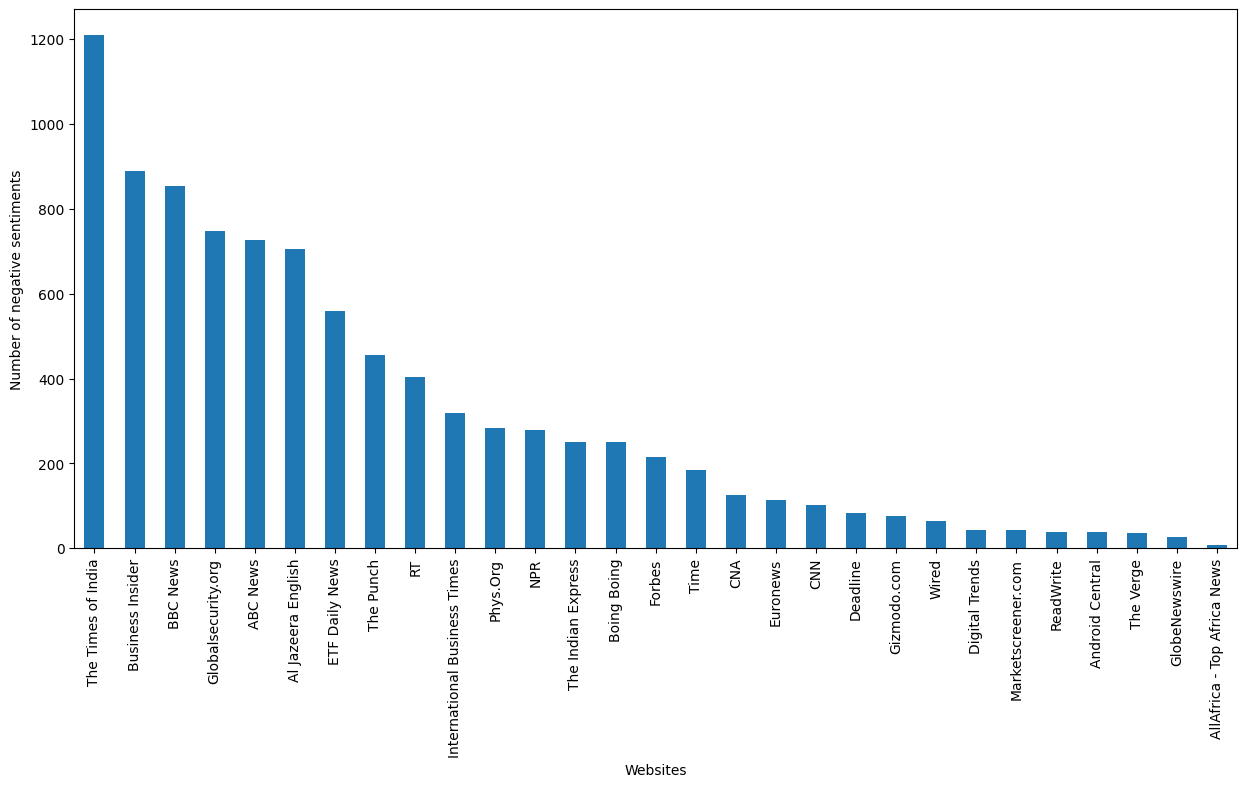

In [ ]:

plt.figure(figsize=(15, 7))
news_data[news_data['title_sentiment']=="Negative"]['source_name'].value_counts() \
            .sort_values(ascending=False) \
            .plot(kind='bar', ylabel='Number of negative sentiments', xlabel='Websites')
plt.show()


In [ ]:
location_data.groupby("Country").value_counts()

Country      SourceCommonName          location
Afghanistan  afghanistan-analysts.org  AF          1
             mrrd.gov.af               AF          1
             pajhwok.com               AF          1
             rawa.org                  AF          1
             tolafghan.com             AF          1
                                                  ..
Zimbabwe     newsday.co.zw             ZI          1
             newzimbabwe.com           ZI          1
             nicaraguadispatch.com     ZI          1
             radiodialogue.com         ZI          1
             zimeye.net                ZI          1
Name: count, Length: 37737, dtype: int64

# How similar are the raw message lengths across sites? Check the distribution among sites



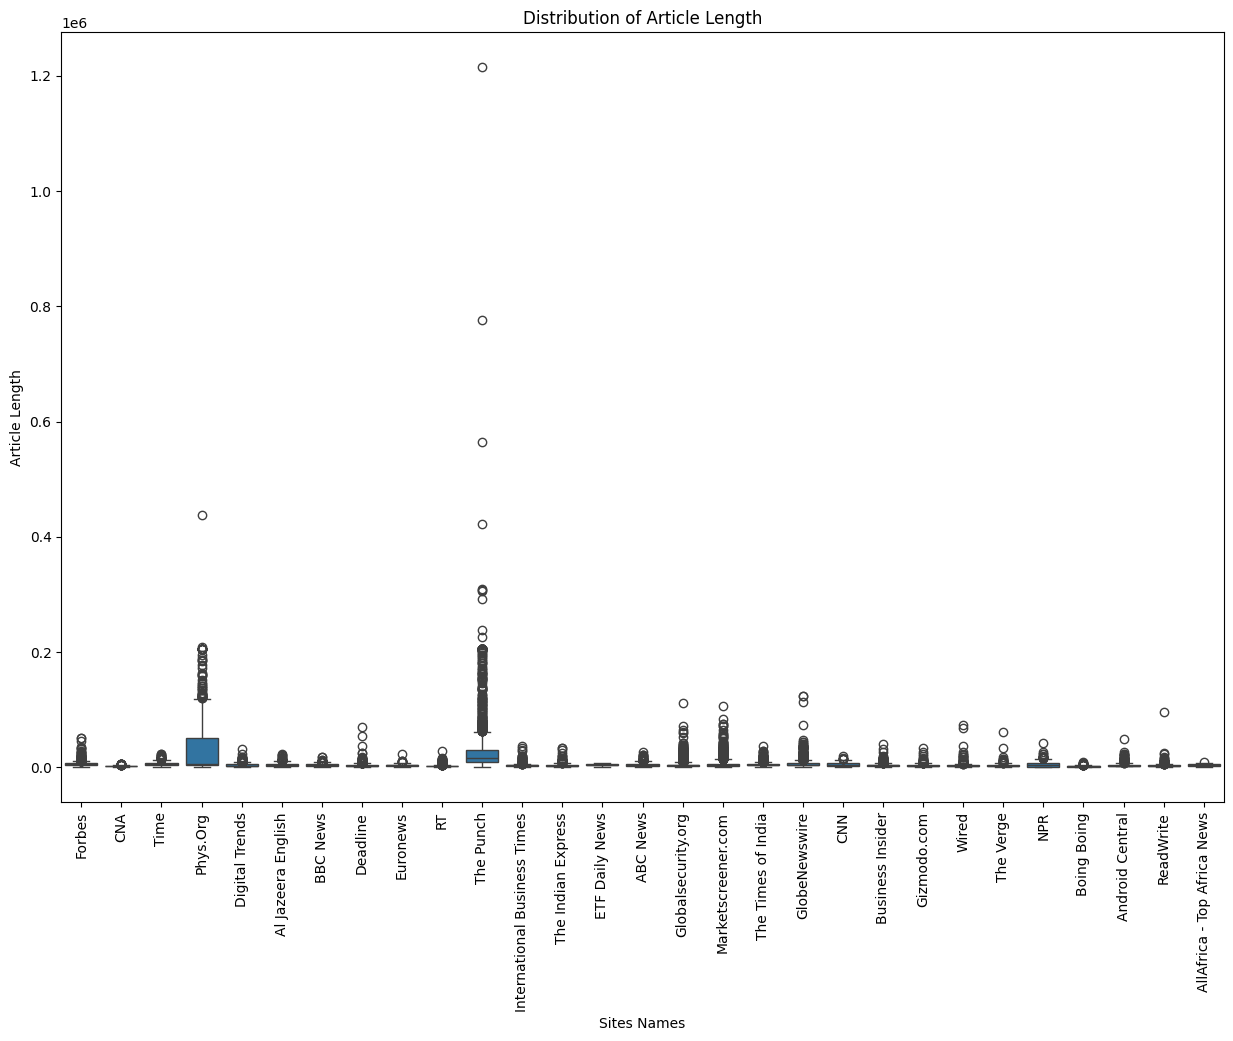

In [ ]:


news_data['article_length']=news_data['article'].apply(lambda x:len(str(x)))


plt.figure(figsize=(15,10))
sns.boxplot(data=news_data, x='source_name', y='article_length')
plt.title("Distribution of Article Length")
plt.xlabel('Sites Names')
plt.ylabel('Article Length')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.show()

# How similar are the number of words in the title across sites? Check the distribution among sites


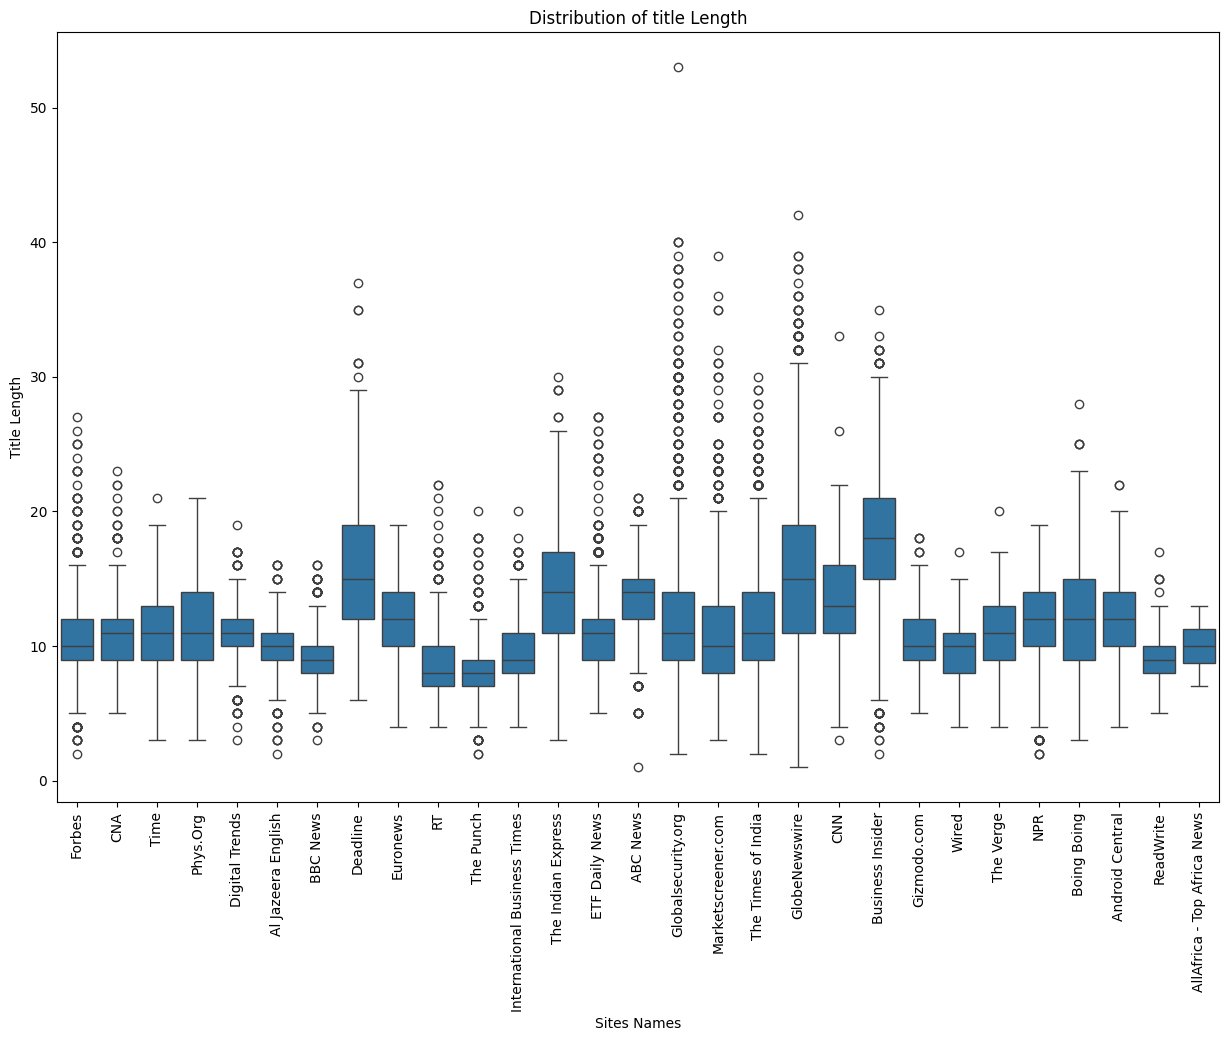

In [ ]:

news_data['title_length']=news_data['title'].apply(lambda x:len(str(x).split(' ')))

plt.figure(figsize=(15,10))
sns.boxplot(data=news_data, x='source_name', y='title_length')
plt.title("Distribution of title Length")
plt.xlabel('Sites Names')
plt.ylabel('Title Length')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.show()
